# Predicting the price of the diamond from the given dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('./Dataset/diamonds.csv',index_col=0)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### there are various parameter which are categorical so we need to convert them. 
#### Color : J is Worst and D is best
#### clarity : I1 repersenting the worst and IF  the best clarity
We will use these features to predict the price of the diamond

In [3]:
data.shape

(53940, 10)

In [4]:
data=data.sample(frac=0.3)

In [5]:
data.shape

(16182, 10)

In [6]:
data.reset_index(inplace=True, drop=True)

In [7]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.40,Premium,F,SI1,62.2,57.0,945,4.72,4.67,2.92
1,0.37,Very Good,G,VS1,59.2,61.0,746,4.63,4.70,2.76
2,1.24,Ideal,I,SI2,61.8,58.0,5866,6.85,6.90,4.25
3,1.01,Premium,D,SI2,61.7,57.0,5006,6.49,6.44,3.99
4,0.40,Good,I,VS2,63.8,54.0,666,4.68,4.72,3.00


In [8]:
#correlation
correlation=data.corr()

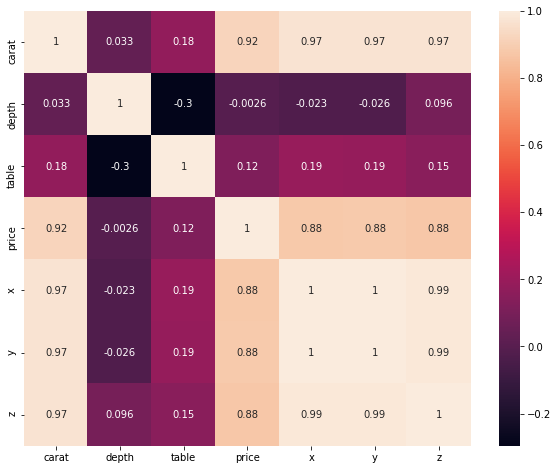

In [9]:
plt.subplots(figsize=(10,8))
sns.heatmap(correlation,annot=True)
plt.show()

In [10]:
data['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [11]:
data['color'].unique()


array(['F', 'G', 'I', 'D', 'J', 'E', 'H'], dtype=object)

In [12]:
data['clarity'].unique()

array(['SI1', 'VS1', 'SI2', 'VS2', 'VVS2', 'IF', 'VVS1', 'I1'], dtype=object)

These categorical data are ordinal categorical data. There is an inherent order to the categories, from worst to the best.

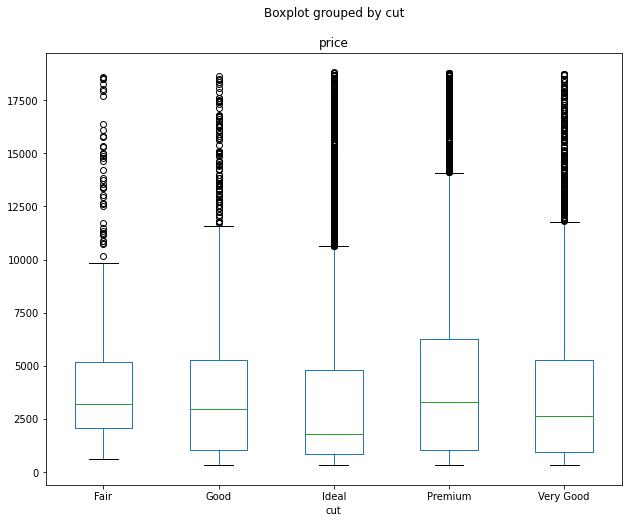

In [13]:
data.boxplot(by='cut',column=['price'],grid=False, figsize=(10,8))
plt.show()

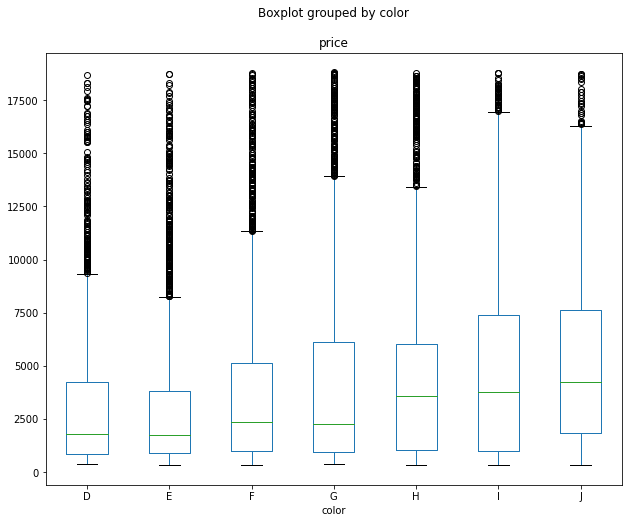

In [14]:
data.boxplot(by='color',column=['price'],grid=False, figsize=(10,8))
plt.show()

Box plots are good way to visualize the categorical data with numerical data

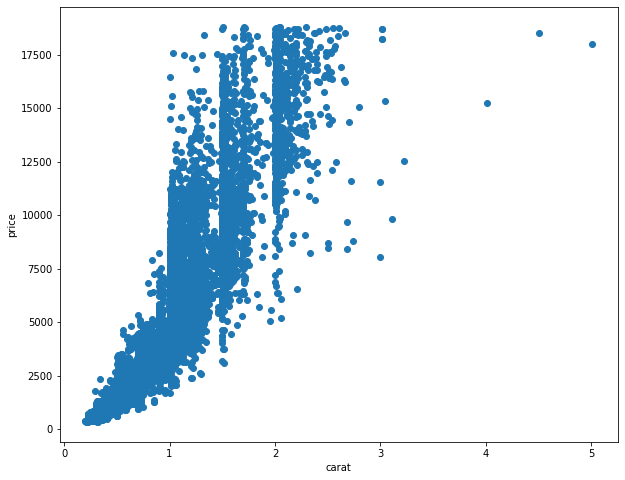

In [15]:
plt.subplots(figsize=(10,8))
plt.scatter(data['carat'],data['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

Linear relationship tend to exist in the above figure

### Machine learning model can't work with catregorical value so we need to encode the data.

If there are ordinal data i.e there is an ordering to the data then we can label these categories in the form of those integer represent that order. Here IF repersent the best quality of dimond then it is 7 and I1 as 0.

In [16]:
clarity_dict={'VS2':3, 'VS1':4, 'VVS1':5, 'SI1':2, 'SI2':1, 'I1':0, 'IF':7, 'VVS2':6}
data['clarity'].replace(clarity_dict,inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.40,Premium,F,2,62.2,57.0,945,4.72,4.67,2.92
1,0.37,Very Good,G,4,59.2,61.0,746,4.63,4.70,2.76
2,1.24,Ideal,I,1,61.8,58.0,5866,6.85,6.90,4.25
3,1.01,Premium,D,1,61.7,57.0,5006,6.49,6.44,3.99
4,0.40,Good,I,3,63.8,54.0,666,4.68,4.72,3.00


If we have nominal or ordinal data, hot encoding is a good way to repersent your categories in numeric form.
It will replace columns with one hot encoded columns. 1 repersent a particular category.

In [17]:
data=pd.get_dummies(data,columns=['cut','color'])
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.40,2,62.2,57.0,945,4.72,4.67,2.92,0,0,0,1,0,0,0,1,0,0,0,0
1,0.37,4,59.2,61.0,746,4.63,4.70,2.76,0,0,0,0,1,0,0,0,1,0,0,0
2,1.24,1,61.8,58.0,5866,6.85,6.90,4.25,0,0,1,0,0,0,0,0,0,0,1,0
3,1.01,1,61.7,57.0,5006,6.49,6.44,3.99,0,0,0,1,0,1,0,0,0,0,0,0
4,0.40,3,63.8,54.0,666,4.68,4.72,3.00,0,1,0,0,0,0,0,0,0,0,1,0


In [18]:
NUMERIC_FEATURE=['carat','depth', 'table','x','y','z']
numeric_df=data[NUMERIC_FEATURE]
numeric_df.describe()

,carat,depth,table,x,y,z
count,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000
mean,0.799994,61.748047,57.458998,5.734581,5.735947,3.540622
std,0.476364,1.414284,2.276737,1.126129,1.117573,0.696608
min,0.200000,44.000000,44.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.050000,62.500000,59.000000,6.550000,6.550000,4.040000
max,5.010000,79.000000,95.000000,10.740000,10.540000,6.980000


Scale of these numeric data are different and lot of difference between mean and st. devialtion. So Standardization is applied to these numeric feature.

In [19]:
from sklearn.preprocessing import scale
numeric_array=scale(numeric_df)
numeric_array[:5]

array([[-0.83970807,  0.31957289, -0.20160953, -0.90097355, -0.95383521,
        -0.89094745],
       [-0.90268705, -1.80170769,  1.55534526, -0.98089582, -0.92699049,
        -1.12063882],
       [ 0.92370339,  0.03673548,  0.23762917,  0.99052021,  1.04162218,
         1.01836215],
       [ 0.44086454, -0.03397387, -0.20160953,  0.67083112,  0.63000317,
         0.64511365],
       [-0.83970807,  1.45092253, -1.51932563, -0.93649456, -0.90909401,
        -0.77610176]])

In [20]:
numeric_df=pd.DataFrame(numeric_array,columns=numeric_df.columns)
numeric_df.describe()

,carat,depth,table,x,y,z
count,1.618200e+04,1.618200e+04,1.618200e+04,1.618200e+04,1.618200e+04,1.618200e+04
mean,2.400612e-16,5.198165e-15,1.181782e-15,4.672103e-16,-1.925086e-16,1.865397e-16
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-1.259568e+00,-1.254953e+01,-5.911713e+00,-5.092453e+00,-5.132663e+00,-5.082815e+00
25%,-8.397081e-01,-5.289393e-01,-6.408482e-01,-9.098538e-01,-9.090940e-01,-9.053032e-01
50%,-2.099183e-01,3.673548e-02,-2.016095e-01,-3.070881e-02,-2.321831e-02,-1.524906e-02
75%,5.248365e-01,5.317009e-01,6.768679e-01,7.241126e-01,7.284338e-01,7.168922e-01
max,8.838062e+00,1.219874e+01,1.648946e+01,4.444938e+00,4.298781e+00,4.937471e+00


In [21]:
data.drop(NUMERIC_FEATURE,inplace=True,axis=1)
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,2,945,0,0,0,1,0,0,0,1,0,0,0,0
1,4,746,0,0,0,0,1,0,0,0,1,0,0,0
2,1,5866,0,0,1,0,0,0,0,0,0,0,1,0
3,1,5006,0,0,0,1,0,1,0,0,0,0,0,0
4,3,666,0,1,0,0,0,0,0,0,0,0,1,0


In [22]:
data=pd.concat([data,numeric_df],axis=1)
data.shape

(16182, 20)

In [23]:
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,2,945,0,0,0,1,0,0,0,1,0,0,0,0,-0.839708,0.319573,-0.201610,-0.900974,-0.953835,-0.890947
1,4,746,0,0,0,0,1,0,0,0,1,0,0,0,-0.902687,-1.801708,1.555345,-0.980896,-0.926990,-1.120639
2,1,5866,0,0,1,0,0,0,0,0,0,0,1,0,0.923703,0.036735,0.237629,0.990520,1.041622,1.018362
3,1,5006,0,0,0,1,0,1,0,0,0,0,0,0,0.440865,-0.033974,-0.201610,0.670831,0.630003,0.645114
4,3,666,0,1,0,0,0,0,0,0,0,0,1,0,-0.839708,1.450923,-1.519326,-0.936495,-0.909094,-0.776102


In [24]:
data.to_csv('./Dataset/diamonds_processed.csv',index=False)


In [25]:
!ls Dataset/


Boston.csv  diamonds.csv  diamonds_processed.csv


In [26]:
from sklearn.model_selection import train_test_split
X=data.drop('price',axis=1)
Y=data['price']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
y_pred = linear_regression.predict(x_test)
y_pred

array([ 2256.55973339,   580.96016487,  1928.42417587, ...,  2793.59612331,
        4334.09364029,  3303.93388951])

In [29]:
train_score=linear_regression.score(x_train,y_train)
print('Training Score : ', train_score)

Training Score :  0.912677857399


In [30]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("training score : ", score)

training score :  0.901422128509
